In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
fraud= pd.read_csv('C:/Users/shrey/Downloads/Assignment/15.Random Forests/Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","Taxable.Income":"income",
                      "City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
fraud.head()

,undergrad,marital,income,population,experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


<AxesSubplot:>

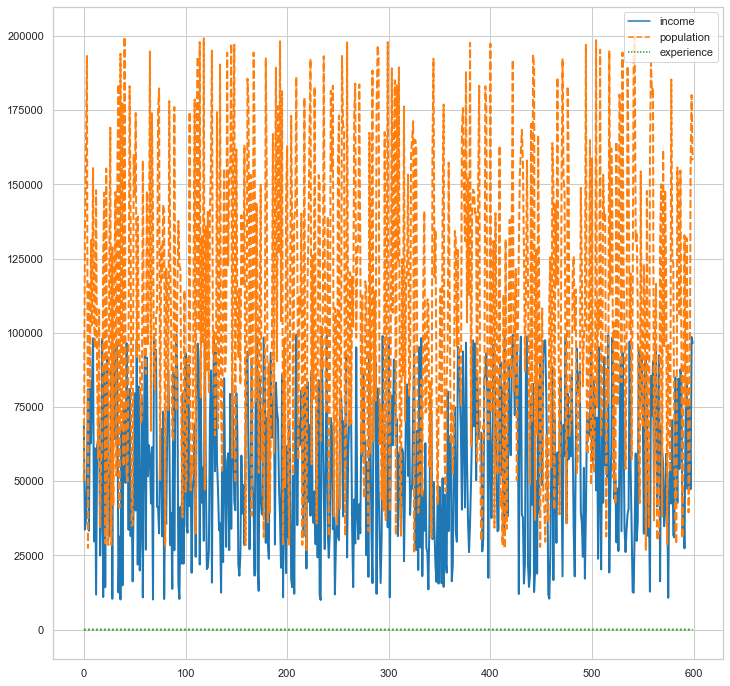

In [4]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
sns.lineplot(data=fraud, palette="tab10", linewidth=2)

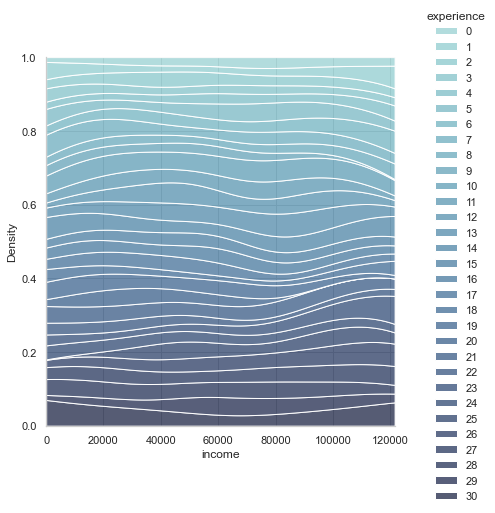

In [6]:
sns.set_theme(style='whitegrid')
sns.displot(
    data=fraud,
    x="income", hue="experience",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

In [7]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variables
df=pd.get_dummies(fraud,columns=['undergrad','marital','urban'], drop_first=True)
df.head()

,income,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [8]:
# Converting the Sales column into categorical value using mean of the column 7.49
taxable_val = []
for value in df["income"]:
    if value<=30000:
        taxable_val.append("risky")
    else:
        taxable_val.append("good")
df["taxable_val"]= taxable_val

In [9]:
df.head()

,income,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES,taxable_val
0,68833,50047,10,0,0,1,1,good
1,33700,134075,18,1,0,0,1,good
2,36925,160205,30,0,1,0,1,good
3,50190,193264,15,1,0,1,1,good
4,81002,27533,28,0,1,0,0,good


In [10]:
X = df.drop(['income','taxable_val'], axis =1)
Y = df['taxable_val'] #Y is our target variable

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y)

In [12]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 4

In [13]:
kfold = KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.745


In [14]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7

cart = DecisionTreeClassifier()
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
(results1.mean())

0.7333333333333333

In [15]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
(results2.mean())

0.7766666666666666

In [16]:
#Stacking
from sklearn.linear_model import LogisticRegression #this are the 3 models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier #stores all 3 models

# create the sub models
estimators = [] #list comprises of all the 3 models
model4 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model4))
model5 = DecisionTreeClassifier()
estimators.append(('cart', model5))
model6 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
(results.mean())

0.7899999999999998